## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm

import os
import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

!ls -l /content/drive


Mounted at /content/drive
total 4
drwx------ 2 root root 4096 Aug 14 16:56 MyDrive


In [5]:
#Q1: compléter le path

#read the path
#SUR GOOGLE
file_path = '/content/drive/MyDrive/style-extension/Analyses'

#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['SYNTHESE.xlsx',
 'SYNTHESE.gsheet',
 'plan_analyses.gdoc',
 'Analyses.ipynb',
 'Analyses_stat.ipynb',
 'Analyses_A1_A2_UD-style.ipynb',
 'Copy of Dictionary Variables.gdoc',
 'Discussion.ipynb',
 'Analyses_B1_A2.ipynb',
 'Z-scores_auteur_auteur-genere.ipynb',
 'Analyses_A1_A2.ipynb',
 'Delta_styles.ipynb',
 'Analyses_A1_B1.ipynb',
 'Dispersion_moyenne.ipynb']

In [6]:
#read the path sur google
cwd = os.path.abspath(file_path)

extension = 'xlsx'
os.chdir(cwd)
csv_files = glob.glob('*.{}'.format('xlsx'))
print(csv_files)

['SYNTHESE.xlsx']


# En français

## Dataset

In [7]:
mean_distances_df = pd.read_excel('/content/drive/MyDrive/style-extension/FRENCH/Résultats/terreau/distance_pertext_umap_A1_A2_FR_new.xlsx')

mean_distances_df["genAI"] = mean_distances_df["Class"].map({"Proust": "No", "Celine": "No", "Yourcenar": "No", "Tuffery": "No",
                                                             "Proust_mistral": "mistral", "Celine_mistral": "mistral", "Yourcenar_mistral": "mistral",
                                                             "Proust_gpt": "gpt", "Celine_gpt": "gpt", "Yourcenar_gpt": "gpt",
                                                             "Proust_gemini": "gemini", "Celine_gemini": "gemini", "Yourcenar_gemini": "gemini",
                                                             })

mean_distances_df["author"] = mean_distances_df["Class"].map({"Proust": "Proust", "Celine": "Celine", "Yourcenar": "Yourcenar","Tuffery": "Tuffery",
                                                             "Proust_mistral": "Proust", "Celine_mistral": "Celine", "Yourcenar_mistral": "Yourcenar",
                                                             "Proust_gpt": "Proust", "Celine_gpt": "Celine", "Yourcenar_gpt": "Yourcenar",
                                                             "Proust_gemini": "Proust", "Celine_gemini": "Celine", "Yourcenar_gemini": "Yourcenar",
                                                             })

mean_distances_df["class"] = mean_distances_df["genAI"].map({"No": "A1", "mistral": "A2", "gpt": "A2", "gemini":"A2"})
mean_distances_df = mean_distances_df.drop(columns=["Class"])

In [8]:
mean_distances_df_2 = pd.read_excel('/content/drive/MyDrive/style-extension/FRENCH/Résultats/terreau/distance_pertext_umap_A1_B1_FR_new.xlsx')

mean_distances_df_2["genAI"] = mean_distances_df_2["Class"].map({"Proust": "No", "Celine": "No", "Yourcenar": "No", "Tuffery": "No",
                                                             "Proust_mistral": "mistral", "Celine_mistral": "mistral", "Yourcenar_mistral": "mistral",
                                                             "Proust_gpt": "gpt", "Celine_gpt": "gpt", "Yourcenar_gpt": "gpt",
                                                             "Proust_gemini": "gemini", "Celine_gemini": "gemini", "Yourcenar_gemini": "gemini",
                                                             })

mean_distances_df_2["author"] = mean_distances_df_2["Class"].map({"Proust": "Proust", "Celine": "Celine", "Yourcenar": "Yourcenar","Tuffery": "Tuffery",
                                                             "Proust_mistral": "Proust", "Celine_mistral": "Celine", "Yourcenar_mistral": "Yourcenar",
                                                             "Proust_gpt": "Proust", "Celine_gpt": "Celine", "Yourcenar_gpt": "Yourcenar",
                                                             "Proust_gemini": "Proust", "Celine_gemini": "Celine", "Yourcenar_gemini": "Yourcenar",
                                                             })

mean_distances_df_2["class"] = mean_distances_df_2["author"].map({"Tuffery": "A1", "Proust": "B1", "Celine": "B1", "Yourcenar":"B1"})
mean_distances_df_2 = mean_distances_df_2.drop(columns=["Class"])

In [9]:
mean_distances_df_A1 = mean_distances_df[mean_distances_df["class"] == "A1"]
mean_distances_df_A2 = mean_distances_df[mean_distances_df["class"] == "A2"]
mean_distances_df_B1 = mean_distances_df_2[mean_distances_df_2["class"] == "B1"]

In [10]:
mean_distances_df_A1.head()

,Text_Index,Mean_Distance_From_Centroid,genAI,author,class
0,0,1.493536,No,Tuffery,A1
1,1,3.086941,No,Tuffery,A1
2,2,1.641952,No,Tuffery,A1
3,3,1.457144,No,Tuffery,A1
4,4,1.759076,No,Tuffery,A1


## Dispersions moyennes

In [11]:
print(f"A1 : {mean_distances_df_A1['Mean_Distance_From_Centroid'].mean()}")
print(f"A2 : {mean_distances_df_A2['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1['Mean_Distance_From_Centroid'].mean()}")

A1 : 1.7857728671865971
A2 : 1.859992443603075
B1 : 1.4084702808167047


In [12]:
print("Pour Proust : ")
print(f"A2 : {mean_distances_df_A2[mean_distances_df_A2['author'] == 'Proust']['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1[mean_distances_df_B1['author'] == 'Proust']['Mean_Distance_From_Centroid'].mean()}")
print("Pour Celine : ")
print(f"A2 : {mean_distances_df_A2[mean_distances_df_A2['author'] == 'Celine']['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1[mean_distances_df_B1['author'] == 'Celine']['Mean_Distance_From_Centroid'].mean()}")
print("Pour Yourcenar : ")
print(f"A2 : {mean_distances_df_A2[mean_distances_df_A2['author'] == 'Yourcenar']['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1[mean_distances_df_B1['author'] == 'Yourcenar']['Mean_Distance_From_Centroid'].mean()}")

Pour Proust : 
A2 : 1.9128901278653556
B1 : 1.496793245899574
Pour Celine : 
A2 : 1.7586554708481077
B1 : 1.3050966448014132
Pour Yourcenar : 
A2 : 1.9084317320957613
B1 : 1.4235209517491267


## Plot

In [32]:
import pickle

with open('/content/drive/MyDrive/style-extension/FRENCH/embeddings/A1_fr/all-roberta-large-v1_embeddings.pkl', "rb") as f:
  points_df = pickle.load(f)

print(points_df[0])


[-0.00456482  0.05138338 -0.02221662 ... -0.03262413  0.04377852
  0.04782958]


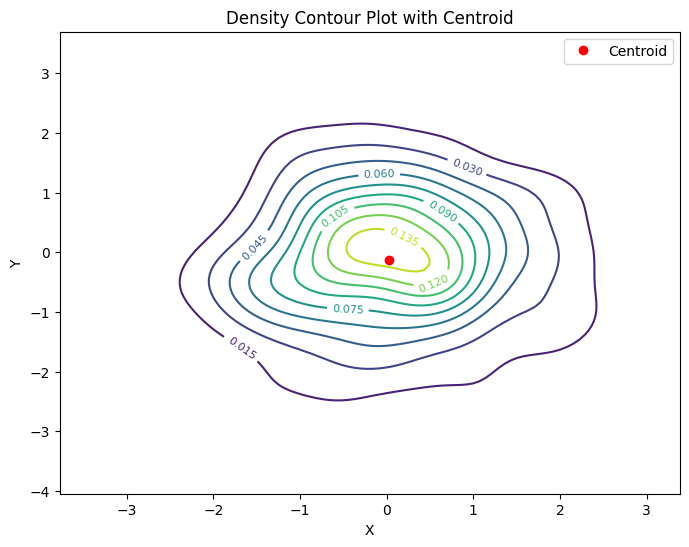

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example: Random points for demonstration
np.random.seed(0)
x =
y = np.random.normal(loc=0, scale=1.0, size=300)
points = np.vstack([x, y])

# Compute centroid
centroid_x, centroid_y = np.mean(x), np.mean(y)

# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
xmin, xmax = x.min() - 1, x.max() + 1
ymin, ymax = y.min() - 1, y.max() + 1

# Create grid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
contours = ax.contour(xx, yy, density, levels=10, cmap='viridis')
ax.clabel(contours, inline=True, fontsize=8)
ax.plot(centroid_x, centroid_y, 'ro', label='Centroid')
ax.set_title("Density Contour Plot with Centroid")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()


# En anglais

## Dataset

In [13]:
mean_distances_df = pd.read_excel('/content/drive/MyDrive/style-extension/ENGLISH/Results/terreau/distance_pertext_umap_A1_A2_EN.xlsx')

mean_distances_df["genAI"] = mean_distances_df["Class"].map({"Proust": "No", "Celine": "No", "Yourcenar": "No", "Tuffery": "No",
                                                             "Proust_mistral": "mistral", "Celine_mistral": "mistral", "Yourcenar_mistral": "mistral",
                                                             "Proust_gpt": "gpt", "Celine_gpt": "gpt", "Yourcenar_gpt": "gpt",
                                                             "Proust_gemini": "gemini", "Celine_gemini": "gemini", "Yourcenar_gemini": "gemini",
                                                             })

mean_distances_df["author"] = mean_distances_df["Class"].map({"Proust": "Proust", "Celine": "Celine", "Yourcenar": "Yourcenar","Tuffery": "Tuffery",
                                                             "Proust_mistral": "Proust", "Celine_mistral": "Celine", "Yourcenar_mistral": "Yourcenar",
                                                             "Proust_gpt": "Proust", "Celine_gpt": "Celine", "Yourcenar_gpt": "Yourcenar",
                                                             "Proust_gemini": "Proust", "Celine_gemini": "Celine", "Yourcenar_gemini": "Yourcenar",
                                                             })

mean_distances_df["class"] = mean_distances_df["genAI"].map({"No": "A1", "mistral": "A2", "gpt": "A2", "gemini":"A2"})
mean_distances_df = mean_distances_df.drop(columns=["Class"])

In [14]:
mean_distances_df_2 = pd.read_excel('/content/drive/MyDrive/style-extension/ENGLISH/Results/terreau/distance_pertext_umap_A1_B1_EN.xlsx')

mean_distances_df_2["genAI"] = mean_distances_df_2["Class"].map({"Proust": "No", "Celine": "No", "Yourcenar": "No", "Tuffery": "No",
                                                             "Proust_mistral": "mistral", "Celine_mistral": "mistral", "Yourcenar_mistral": "mistral",
                                                             "Proust_gpt": "gpt", "Celine_gpt": "gpt", "Yourcenar_gpt": "gpt",
                                                             "Proust_gemini": "gemini", "Celine_gemini": "gemini", "Yourcenar_gemini": "gemini",
                                                             })

mean_distances_df_2["author"] = mean_distances_df_2["Class"].map({"Proust": "Proust", "Celine": "Celine", "Yourcenar": "Yourcenar","Tuffery": "Tuffery",
                                                             "Proust_mistral": "Proust", "Celine_mistral": "Celine", "Yourcenar_mistral": "Yourcenar",
                                                             "Proust_gpt": "Proust", "Celine_gpt": "Celine", "Yourcenar_gpt": "Yourcenar",
                                                             "Proust_gemini": "Proust", "Celine_gemini": "Celine", "Yourcenar_gemini": "Yourcenar",
                                                             })

mean_distances_df_2["class"] = mean_distances_df_2["author"].map({"Tuffery": "A1", "Proust": "B1", "Celine": "B1", "Yourcenar":"B1"})
mean_distances_df_2 = mean_distances_df_2.drop(columns=["Class"])

In [15]:
mean_distances_df_A1 = mean_distances_df[mean_distances_df["class"] == "A1"]
mean_distances_df_A2 = mean_distances_df[mean_distances_df["class"] == "A2"]
mean_distances_df_B1 = mean_distances_df_2[mean_distances_df_2["class"] == "B1"]

In [16]:
mean_distances_df_A1.head()

,Text_Index,Mean_Distance_From_Centroid,genAI,author,class
0,0,1.328155,No,Tuffery,A1
1,1,4.279137,No,Tuffery,A1
2,2,1.392155,No,Tuffery,A1
3,3,1.260702,No,Tuffery,A1
4,4,1.436695,No,Tuffery,A1


## Dispersions moyennes

In [17]:
print(f"A1 : {mean_distances_df_A1['Mean_Distance_From_Centroid'].mean()}")
print(f"A2 : {mean_distances_df_A2['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1['Mean_Distance_From_Centroid'].mean()}")

A1 : 1.558661020809156
A2 : 1.7200397232978066
B1 : 1.2714989556640608


In [18]:
print("Pour Proust : ")
print(f"A2 : {mean_distances_df_A2[mean_distances_df_A2['author'] == 'Proust']['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1[mean_distances_df_B1['author'] == 'Proust']['Mean_Distance_From_Centroid'].mean()}")
print("Pour Celine : ")
print(f"A2 : {mean_distances_df_A2[mean_distances_df_A2['author'] == 'Celine']['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1[mean_distances_df_B1['author'] == 'Celine']['Mean_Distance_From_Centroid'].mean()}")
print("Pour Yourcenar : ")
print(f"A2 : {mean_distances_df_A2[mean_distances_df_A2['author'] == 'Yourcenar']['Mean_Distance_From_Centroid'].mean()}")
print(f"B1 : {mean_distances_df_B1[mean_distances_df_B1['author'] == 'Yourcenar']['Mean_Distance_From_Centroid'].mean()}")

Pour Proust : 
A2 : 1.693890371353591
B1 : 1.329233343475001
Pour Celine : 
A2 : 1.6472530863512747
B1 : 1.3303285446649253
Pour Yourcenar : 
A2 : 1.8189757121885546
B1 : 1.1549349788522563


# Avec SYNTHESE.xlsx

In [19]:
df_french = pd.read_excel('SYNTHESE.xlsx', sheet_name="ENGLISH")

In [20]:
df_grouped = df_french.groupby('UMAP_Dimension')['mean_distance_A2'].mean().reset_index().iloc[[1,2,3,0]]
df_grouped

,UMAP_Dimension,mean_distance_A2
1,2D,1.718930
2,3D,1.554268
3,5D,1.479199
0,10D,1.463562


In [21]:
df_grouped = df_french.groupby('UMAP_Dimension')['mean_distance_B'].mean().reset_index().iloc[[1,2,3,0]]
df_grouped

,UMAP_Dimension,mean_distance_B
1,2D,1.473882
2,3D,1.388645
3,5D,1.349183
0,10D,1.341736


In [22]:
df_grouped = df_french.groupby('UMAP_Dimension')['mean_distance_A1'].mean().reset_index().iloc[[1,2,3,0]]
df_grouped

,UMAP_Dimension,mean_distance_A1
1,2D,1.629699
2,3D,1.470828
3,5D,1.395873
0,10D,1.379899


In [23]:
df_french.groupby('UMAP_Dimension')['mean_distance_A2'].mean()

,mean_distance_A2
UMAP_Dimension,
10D,1.463562
2D,1.718930
3D,1.554268
5D,1.479199


In [24]:
print("Pour A2")
df_french.groupby(['UMAP_Dimension', 'B1_author'])['mean_distance_A2'].mean().unstack()

Pour A2


B1_author,celine,proust,yourcenar
UMAP_Dimension,,,
10D,1.371867,1.435361,1.583458
2D,1.646483,1.693525,1.816781
3D,1.470647,1.529512,1.662644
5D,1.388921,1.451889,1.596786


In [25]:
print("Pour B1")
df_french.groupby(['UMAP_Dimension', 'B1_author'])['mean_distance_B'].mean().unstack()

Pour B1


B1_author,celine,proust,yourcenar
UMAP_Dimension,,,
10D,1.384246,1.409308,1.231654
2D,1.560466,1.506452,1.354728
3D,1.449825,1.440181,1.275930
5D,1.393382,1.415200,1.238966


In [26]:
print("Pour A1")
df_french.groupby(['UMAP_Dimension', 'B1_author'])['mean_distance_A1'].mean().unstack()

Pour A1


B1_author,celine,proust,yourcenar
UMAP_Dimension,,,
10D,1.393597,1.406378,1.339721
2D,1.645259,1.662068,1.581770
3D,1.479653,1.503232,1.429599
5D,1.409437,1.424185,1.353997
